# Creation of the dataset


## Cleaning the existing dataset

First of all, after the dataset was published, some of the videos have become private and therefore we do not want them in the dataset. So, first we have to detect and clean all private videos

In [1]:
import youtube_comments as yc
import youtube_comments_api as yc_api
from tqdm import tqdm, tqdm_notebook, tnrange
from time import sleep

In [17]:
%%time
# Here we check the time it takes to check if a non-private video is private
yc.is_video_private("7zCIRPQ8qWc")

CPU times: user 29.2 ms, sys: 6.7 ms, total: 35.9 ms
Wall time: 704 ms


False

In [4]:
yc.is_video_private("Gr9aYWkT4qk")

True

In [3]:
%%time
# Here we check the time it takes to check if a private video is private
yc.is_video_private("oyP16Qg3UP4")

CPU times: user 32.2 ms, sys: 3.65 ms, total: 35.9 ms
Wall time: 391 ms


True

In [9]:
%%time
# This is a test if all the comments of a youtube video are downloaded correctly
youtube_id = "7zCIRPQ8qWc"
for comment in yc.download_comments(youtube_id):
    print(comment['text'])

"Hilarious" isn't the word I would use. I would use "boring".﻿
great video !!!!!!!!!!﻿
that's so funny LLLLLLLOOOOOOOOLLLLLLLL!!!!!!!!﻿
Waha haha hahaha﻿
Waha haha hahaha﻿
i couldn't stop laughing and feeling bad for the cats
﻿
ik huilde bijna van het lachen﻿
OMG XD﻿
Суууууууууууууууупер﻿
We were ALL kids once! Adults are even suckier!﻿
True, but nows the time to teach him/her NOT to do that kinda stuff to kitty! :)
They learn quick!﻿
I agree! I saw another video like this and the 3 year old kid threw a cat into the pool! I would've whacked the parents upside the head and swatted the kid on the butt and tell him to NEVER ever be mean to any animal, especially throwing our kitty into water! Yeah, that "baby" looked like he was trying to drown the cat! The parents better watch out for that, it can lead to other things with animals that are hurtful to them! And he could have gotten badly scratched up too.﻿
Epic - Cats the song xD
/watch?v=Nxxu0i9UVMk﻿
The last two aren't really funny. the

# Reading the dataset

In [4]:
train_unique = yc.unique_videos_in_dataset('data/comedy_comparisons.train')
test_unique = yc.unique_videos_in_dataset('data/comedy_comparisons.test')
with open('train_unique', 'w') as t:
    t.write("\n".join(train_unique))
with open('test_unique', 'w') as t:
    t.write("\n".join(test_unique))

print("Found {0} train unique videos and {1} test videos.".format(len(train_unique), len(test_unique)))

Found 18474 train unique videos and 4263 test videos.


In [5]:
# Counting the number of unique and non private videos in the dataset
# This cell shows how it was initially run for demonstrational purposes

from tqdm import tqdm, tqdm_notebook, tnrange
from time import sleep

pbar = tqdm_notebook(range(len(train_unique)), desc="Downloading video")
train = yc.non_private_videos(train_unique, pbar)
test = yc.non_private_videos(test_unique, pbar)
with open('train_unique_non_private', 'w') as t:
    t.write("\n".join(train))
with open('test_unique_non_private', 'w') as t:
    t.write("\n".join(test))
print("There are {0} unique non-private videos in train and {1} unique non-private in test".format(len(train), len(test)))

KeyboardInterrupt: 

In [1]:
# Now create other train and test datasets without the private videos
import csv
def clean_dataset(keep_id_file, old_dataset, new_dataset):
    """
    Will read file old_dataset and write to new_dataset
    keeping all ids in keep_id_file
    """
    to_keep = {}
    with open(keep_id_file, "r") as f:
        for line in f:
            to_keep[line.strip()] = True
    # Now remove them
    with open(old_dataset) as old_file:
        with open(new_dataset, "w") as new_file:
            old_ds = csv.reader(old_file, delimiter=',')
            for row in old_ds:
                if (row[0] in to_keep) and (row[1] in to_keep):
                    new_file.write(",".join(row) + "\n")

def num_of_lines(file):
    with open(file, 'r') as f:
        return sum(1 for line in f)
            
clean_dataset('data/train_unique_non_private', 'data/comedy_comparisons.train', 'data/comedy_comparisons_clean.train')
print("Initial train dataset lines:", num_of_lines('data/comedy_comparisons.train'), "Clean dataset:", num_of_lines('data/comedy_comparisons_clean.train'))
clean_dataset('data/test_unique_non_private','data/comedy_comparisons.test', 'data/comedy_comparisons_clean.test')
print("Initial train dataset lines:", num_of_lines('data/comedy_comparisons.test'), "Clean dataset:", num_of_lines('data/comedy_comparisons_clean.test'))


Initial train dataset lines: 912969 Clean dataset: 441479
Initial train dataset lines: 225593 Clean dataset: 130615


In [11]:
# Select 30 videos at random to then measure the average time to download
import numpy as np
selected = []
file = './data/comedy_comparisons_clean.train'
unique = 0
with open(file) as csvfile:
    encountered = {}
    youtube_id = csv.reader(csvfile, delimiter = ',')
    for row in youtube_id:
        if row[0] not in encountered:
            if np.random.random_sample() < 0.5:
                selected += [row[0]]
                if len(selected) >= 30:
                    break
            encountered[row[0]] = True
            unique += 1
        if row[1] not in encountered:
            if np.random.random_sample() < 0.5:
                selected += [row[1]]
                if len(selected) >= 30:
                    break
            encountered[row[1]] = True
            unique += 1

selected



['y2emSXSE-N4',
 'HZPUQQNRvOg',
 'vX95JgKGu0o',
 'wu4SU70w7LA',
 '2FHH-9teZP0',
 'SG2B7dIqbNQ',
 'rhjIStU0JvI',
 'bfU4rTa-PfQ',
 'Lr4SS1zxRYg',
 'g6lJ2k3TCFg',
 'UPTrASEx_p8',
 'plieAqK2a00',
 'JmtITSojOF8',
 'sfQEd-lVHCE',
 'wY-1KNh7-NQ',
 'YWzqfaX4ofU',
 'ot0YhG58PiM',
 'dRZIWb_Nzwo',
 'KPP5NbjW9eI',
 'Uomk60wP2mI',
 'cvoOHcAlY2o',
 'dbEq8b3y8ws',
 '2HFTEykZ8mY',
 'ap9Fp8lBtMo',
 'qrrAB-wu_8s',
 'w8UWgufUIv0',
 'l1Sj3HSXGxw',
 'wHOraxZ3RKM',
 'NA3I4aZk0fQ',
 'PtTwGA6uVcY']

In [33]:
%%time
import csv
import sys
import numpy as np
#with open('./comedy_comparisons.train') as csvfile:
#    youtube_id_reader = csv.reader(csvfile, delimiter = ',')
#visited = {}
SIZE = 200
chunk = 1
unique_videos = []
with open('data/train_unique_non_private') as f:
    for l in f:
        unique_videos += [l.strip()]
selected = unique_videos[((chunk * SIZE) + 1):(((chunk + 1) * SIZE)+1)]

pbar = tqdm_notebook(range(SIZE), desc="Downloading comments")

i = 0
fieldnames = ['youtube_id', 'cid', 'text', 'time', 'author']
with open('data/dataset_movies.csv', 'a') as outputfile:
    writer = csv.DictWriter(outputfile, fieldnames=fieldnames)
    writer.writeheader()   
    for row in selected:
        #print(row)
        def download_video_comments(youtube_id):  
            global i
            global visited
            #if youtube_id not in visited:
            for comment in yc.download_comments(youtube_id):
                writer.writerow({'youtube_id': youtube_id, 'cid': comment['cid'], 'text': comment['text'], 'time': comment['time'], 'author': comment['author']})
                sleep(0.1)
                #try:
                #    print(str(youtube_id) + ':' + comment['text'])
                #    sys.stdout.flush()
                #except:
                #    pass

                #print(youtube_id)
                #visited[youtube_id] = True
               # i = i + 1
                #print(str(i) + "-" * 15 + "\n\n")

        download_video_comments(row)
        pbar.update(1)
        sleep(0.5)



            

ReadTimeout: HTTPSConnectionPool(host='www.youtube.com', port=443): Read timed out. (read timeout=None)

In [31]:
all(selected) != all(unique_videos[136:271])

False

In [5]:
unique_videos[136]

IndexError: list index out of range

In [12]:
%%time
# import csv
# import sys
# import numpy as np
#with open('./comedy_comparisons.train') as csvfile:
#    youtube_id_reader = csv.reader(csvfile, delimiter = ',')
visited = {}
SIZE = 89
chunk = 1
start=((chunk * SIZE))
end=(((chunk + 1) * SIZE)-1)
# start=130
# end=133
unique_videos = []
with open('data/train_unique_non_private') as f:
    for l in f:
        unique_videos += [l.strip()]
selected = unique_videos[start:end]
print("will download from {0}-{1}".format(start, end))

pbar = tqdm_notebook(range(SIZE), desc="Downloading comments")

for video in selected:
   video_comment_threads = yc_api.get_comment_threads(youtube_service=yc_api.youtube, video_id=video, csvfile="data/dataset_movies.csv")
   pbar.update(1)

print("FINISHED")
            

will download from 89-177

FINISHED
CPU times: user 1min 5s, sys: 3.77 s, total: 1min 9s
Wall time: 1h 44min 22s


# Notes about progress
* All comments of all videos tested are downloaded successfully and can be saved in a CSV file
* However, many of the videos of the dataset are now private and must be cleaned
* Any rows containing private videos must be eliminated and then estimate the average time to download video comments (this code is already tested), to decide how many videos to use in the datasets train and test
* Finally create the final script to download the dataset

In [13]:
selected[-1]

'K4zpeqFjTaw'

# Some preliminary questions to answer

1. How many unique videos are there?
1. How many comments per video (average and distribution)
1. How many different comment authors are there?
1. Average comments per author
1. Comments over time
1. How many comments have over 0 likes?
1. Create a corpus out of the comments and save it
1. Create a tfidf model out of the corpus
1. Create a wordcloud


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

In [23]:
# Load and check dataset

data = pd.read_csv("data/dataset_movies.90_680.csv")

In [24]:
data.head(10)

,videoId,textDisplay,isReplyTo,canReply,totalReplyCount,kind,etag,id,authorChannelId,authorDisplayName,likeCount,publishedAt,updatedAt,viewerRating
0,nmb84jjcZjc,I remember I wanted that Betch shirt I was gon...,NaN,NaN,4,youtube#commentThread,"""I_8xdZu766_FSaexEaDXTIfEWc0/2ZWuezPa-dSVVE6e-...",z121znfphr22ehptg23ewfm5vtvdg1qgs04,{'value': 'UCPb-XI1NOAv6P0FcL2-bS-g'},SoraRoxasKHII,14,2016-01-29T11:23:33.000Z,2016-01-29T11:23:33.000Z,none
1,nmb84jjcZjc,+Seth the ocean king hahaha XD,z121znfphr22ehptg23ewfm5vtvdg1qgs04,NaN,0,youtube#comment,"""I_8xdZu766_FSaexEaDXTIfEWc0/Px_oQtakVAlBvIOFN...",z121znfphr22ehptg23ewfm5vtvdg1qgs04.1467240990...,{'value': 'UCPb-XI1NOAv6P0FcL2-bS-g'},SoraRoxasKHII,0,2016-06-29T22:56:30.000Z,2016-06-29T22:56:30.000Z,none
2,nmb84jjcZjc,+SoraRoxasKHII Try some whiskey it'll make ya ...,z121znfphr22ehptg23ewfm5vtvdg1qgs04,NaN,0,youtube#comment,"""I_8xdZu766_FSaexEaDXTIfEWc0/dGqBTJXnB90uwhwJu...",z121znfphr22ehptg23ewfm5vtvdg1qgs04.1466338946...,{'value': 'UCVnpGkFo65izBU2RufXdsOw'},Seiko's Dead Body,0,2016-06-19T12:22:26.000Z,2016-06-19T12:22:26.000Z,none
3,nmb84jjcZjc,+Sydney Moody I still want it lol,z121znfphr22ehptg23ewfm5vtvdg1qgs04,NaN,0,youtube#comment,"""I_8xdZu766_FSaexEaDXTIfEWc0/w9JCjJYZMKtv-a7qg...",z121znfphr22ehptg23ewfm5vtvdg1qgs04.1458469581...,{'value': 'UCPb-XI1NOAv6P0FcL2-bS-g'},SoraRoxasKHII,1,2016-03-20T10:26:21.000Z,2016-03-20T10:26:21.000Z,none
4,nmb84jjcZjc,"You and I both, man.",z121znfphr22ehptg23ewfm5vtvdg1qgs04,NaN,0,youtube#comment,"""I_8xdZu766_FSaexEaDXTIfEWc0/EHZITslEfqM986ukh...",z121znfphr22ehptg23ewfm5vtvdg1qgs04.1457626730...,{'value': 'UCKJaihNjRrekieuUNaGkFtQ'},Sydney Moody,2,2016-03-10T16:18:50.000Z,2016-03-10T16:18:50.000Z,none
5,nmb84jjcZjc,"i really want the ""whore"" shirt... might have ...",NaN,NaN,1,youtube#commentThread,"""I_8xdZu766_FSaexEaDXTIfEWc0/UkcTN69tm1zDAvDUd...",z13th3jbznyiwvhcl225zvppakbixv4m2,{'value': 'UCvJ3Soa45orV19ndMUSIMgg'},captn killingsworth,3,2015-11-06T00:32:21.000Z,2015-11-06T00:32:21.000Z,none
6,nmb84jjcZjc,Yeah same lmao I searched all over online for ...,z13th3jbznyiwvhcl225zvppakbixv4m2,NaN,0,youtube#comment,"""I_8xdZu766_FSaexEaDXTIfEWc0/TmJT9RoT6NFgVTOz1...",z13th3jbznyiwvhcl225zvppakbixv4m2.145033120105...,{'value': 'UCvKb06q8o2aOVb-MHmRaXbg'},Innelda Isher,0,2015-12-17T05:46:41.000Z,2015-12-17T05:46:41.000Z,none
7,nmb84jjcZjc,I finally understood the deck part...﻿,NaN,NaN,0,youtube#commentThread,"""I_8xdZu766_FSaexEaDXTIfEWc0/dQuRs-JUELogavYaD...",z12lc1mhbuavevxfm23wi1dzjzragrf5z04,{'value': 'UCYfYCRqRmt6IPpn3gtRpU_Q'},What-even-am-i,7,2015-01-29T00:26:08.000Z,2015-01-29T00:26:08.000Z,none
8,nmb84jjcZjc,The mom looks like my fifth grade teacher﻿,NaN,NaN,0,youtube#commentThread,"""I_8xdZu766_FSaexEaDXTIfEWc0/NE37KQ7x3eOkTH-Du...",z135chypdomest25404cijmrazauhn3rsd0,{'value': 'UCP4LqsCvcS-lgISJxh7LO7w'},Emmalise Houston,3,2014-07-27T09:29:30.000Z,2014-07-27T09:29:30.000Z,none
9,nmb84jjcZjc,The girl that plays Kelly's mom does such an a...,NaN,NaN,0,youtube#commentThread,"""I_8xdZu766_FSaexEaDXTIfEWc0/jXvzQA6wcBVWeI8WO...",z23txp3qipzzxlcou04t1aokgml5pburw33iyhr0f0ezbk...,{'value': 'UCT7Ihd-2JnpjdUsh6p6uVaw'},Lisa Doherty,0,2013-08-25T18:17:40.000Z,2013-08-25T18:17:40.000Z,none


In [5]:
len(data)

74498

In [6]:
data.dtypes

videoId              object
textDisplay          object
canReply               bool
totalReplyCount       int64
kind                 object
etag                 object
id                   object
authorChannelId      object
authorDisplayName    object
likeCount             int64
publishedAt          object
updatedAt            object
viewerRating         object
dtype: object

In [7]:
# How many unique videos are there?
len(pd.unique(data['videoId']))

190

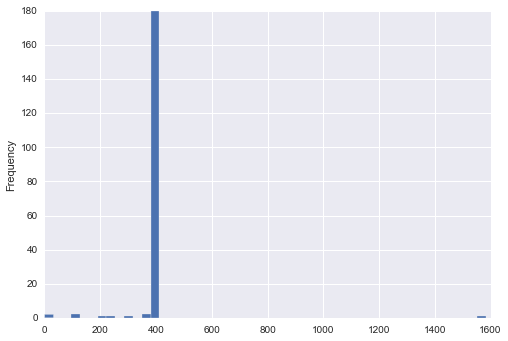

In [8]:
# How many comments are there per video? (Distribution)
# histogram for the previous of 400
data.videoId.value_counts().plot(kind = 'hist', bins = 50)

In [9]:
# How many comments are there per video? (Average number) + std
round(data.groupby('videoId').size().mean())

392.0

In [10]:
# How many different comment authors are there? 
len(pd.unique(data.authorDisplayName))

61149

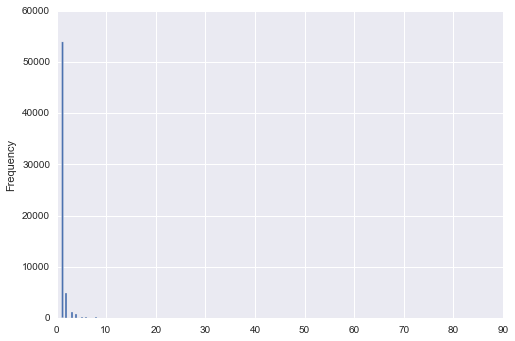

In [11]:
# Comments per author (distribution) 0-8 
data.authorDisplayName.value_counts().plot(kind='hist', bins = 200)

In [12]:
# Average comments per author
round(data.groupby('authorDisplayName').size().mean())

1.0

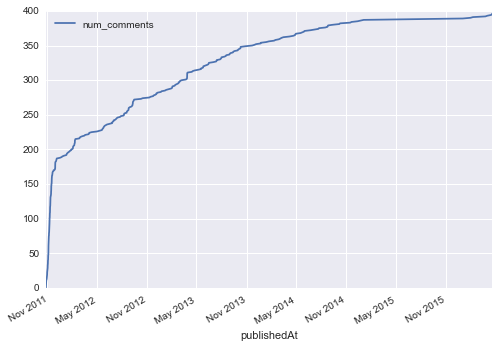

In [13]:
# Comments over time for a specific video + for average and variance (even without plot)
data['publishedAt'] = pd.to_datetime(data['publishedAt'])
data['updatedAt'] = pd.to_datetime(data['updatedAt'])
data_by_time = data.sort_values(by = ['videoId', 'publishedAt'])
df = data_by_time[data_by_time.videoId == '-3lppfJv8IQ'][['videoId', 'publishedAt']]
df['num_comments'] = range(1, len(df) + 1)
dfplt = df.set_index(df.publishedAt)
#dfplt = dfplt[['videoId', 'num_comments']]
dfplt.plot()

In [14]:
# How many comments have over 0 likes?
print("{0} out of {1} comments have more than 0 likes".format(len(data[data.likeCount > 0]), len(data)))

22933 out of 74498 comments have more than 0 likes


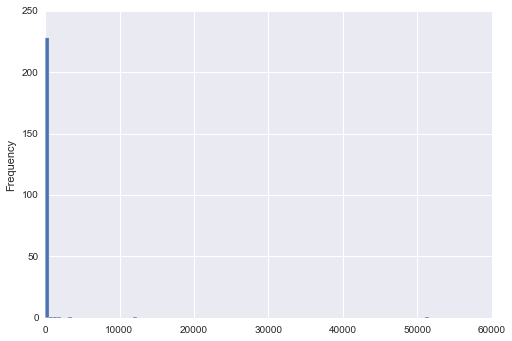

In [15]:
# Like distribution for all comments + different histograms
data.likeCount.value_counts().plot(kind = 'hist', bins = 100)

In [16]:
# Initialize gensim and start NLP
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim
from gensim import corpora
from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

def iter_comments(commentsIterable):
    for entry in commentsIterable:
        comment = tokenize(entry[2])
        yield entry[1], comment
        

In [18]:
# Create a corpus out of the comments and save it
commentsList = data[['videoId', 'textDisplay']].dropna().itertuples()
stream = iter_comments(commentsList)
doc_stream = (tokens for _, tokens in stream)
id2word = gensim.corpora.Dictionary(doc_stream)
id2word.save('data/youtube_comments.dict')

In [96]:

# i = 0
# for entry in iter_comments(commentsList):
#     if i > 9:
#         break
#     print(entry)
#     i += 1
# textList = data.textDisplay.dropna().tolist()
# #textList[3572]
# text = u"".join(textList)
# tokens = [token for token in simple_preprocess(text) if token not in STOPWORDS]
# id2word = gensim.corpora.Dictionary([tokens])
# id2word.save('data/youtube_comments.dict')

In [63]:
# Get frequency of the word massive
id2word.token2id['massive']

1389

In [64]:
print("Number of tokens before filtering {0}".format(len(id2word)))

Number of tokens before filtering 45450


In [65]:
# Filter words + maybe language detector --> ignore or put it in another dataset + check youtube api for language
# ignore words that appear in less than 20 documents or more than 10% documents
id2word.filter_extremes(no_below=20, no_above=0.1)
print(id2word)

Dictionary(3173 unique tokens: ['animation', 'helped', 'public', 'dbz', 'machine']...)


In [66]:
# Vectorize according to the dictionary
sample_comment = data.textDisplay.tolist()[15]
sample_comment

'This was definitely worth watching! Had my partner and I in fits of laughter'

In [67]:
sample_bow = id2word.doc2bow(tokenize(sample_comment))
print(sample_bow)

[(231, 1), (2277, 1), (2298, 1), (2565, 1), (2579, 1)]


In [68]:
print(id2word[231], id2word[2277], id2word[2298], id2word[2565], id2word[2579])

watching worth fits laughter definitely


In [19]:
import itertools
# Create a bag-of-words corpus

class YoutubeCommentsCorpus(object):
    def __init__(self, comment_tuples, dictionary, clip_docs=None):
        self.comment_tuples = comment_tuples
        self.dictionary = dictionary
        self.clip_docs = clip_docs
    
    def __iter__(self):
        self.video_ids = []
        for video_id, tokens in itertools.islice(iter_comments(self.comment_tuples), self.clip_docs):
            print("MPAINO")
            self.video_ids.append(video_id)
            print(self.dictionary.doc2bow(tokens))
            yield self.dictionary.doc2bow(tokens)
    
    def __len__(self):
        return self.clip_docs
        

In [21]:
# comment_corpus = YoutubeCommentsCorpus(commentsList, id2word)
# vector = next(iter(comment_corpus))
# print(vector)
for video_id, tokens in itertools.islice(iter_comments(commentsList),None):
    print(video_id, tokens)

# for item in iter_comments(commentsList):
#     print(item)

In [ ]:
# Have more data over 100 MB in order to split with cross-validation "TECHNIQUES for little data", try to find similar dataset

In [ ]:
# Try simplest model + see the misclassified + try better models
# Naïve Bayes, 5% for test data and 90% for training

# Continue downloading (IMPORTANT!!!)
# Matrix for evaluation (Evaluation in scikit - learn --> maybe later rewrite it)
# word2vec --> reduce dimensionality --> tSNE (and you can visualize it (do it later))
# Naïve bayes with bag-of-words
# Be careful about the sparse vectors
# scikit-learn 
# Forgot sth about classifiers
# Basic classifiers